<a href="https://colab.research.google.com/github/hazmicokro/PYTN_Prakerja_Moch-Hazmi-Cokro-M/blob/main/PYTN_Prakerja_Moch%20Hazmi%20Cokro%20Mandiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Mochammad Hazmi Cokro Mandiri 

Email : hazmicokro@gmail.com 

Prakerja Gelombang 26

#Final Project
Hearth Disease UCI using Machine Learning Classification Model

##[-] Library

In [79]:
# Connect Gdrive
from google.colab import drive

# Visualisasi
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns

# Modelling
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from xgboost import XGBClassifier
from sklearn import metrics

# Split Data
from sklearn.model_selection import train_test_split

# Pengujian
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


##**[1] Exploratory Data Analysis (EDA)**
Melakukan explorasi lebih lanjut terkait dengan data yang dimiliki

In [2]:
# Mount Gdrive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Masuk directory file
%cd '/content/drive/MyDrive/PYTN_Prakerja_Moch Hazmi Cokro M'

/content/drive/MyDrive/PYTN_Prakerja_Moch Hazmi Cokro M


In [4]:
# Read File CSV / dataset yang dimiliki
data = pd.read_csv("heart.csv")
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [5]:
# Berisi Informasi tipe data yang dipakai setiap kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Melihat ukuran jumlah data baris dan kolom
data.shape

(303, 14)

In [7]:
# Mengecek apakah terdapat nilai null / nan
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

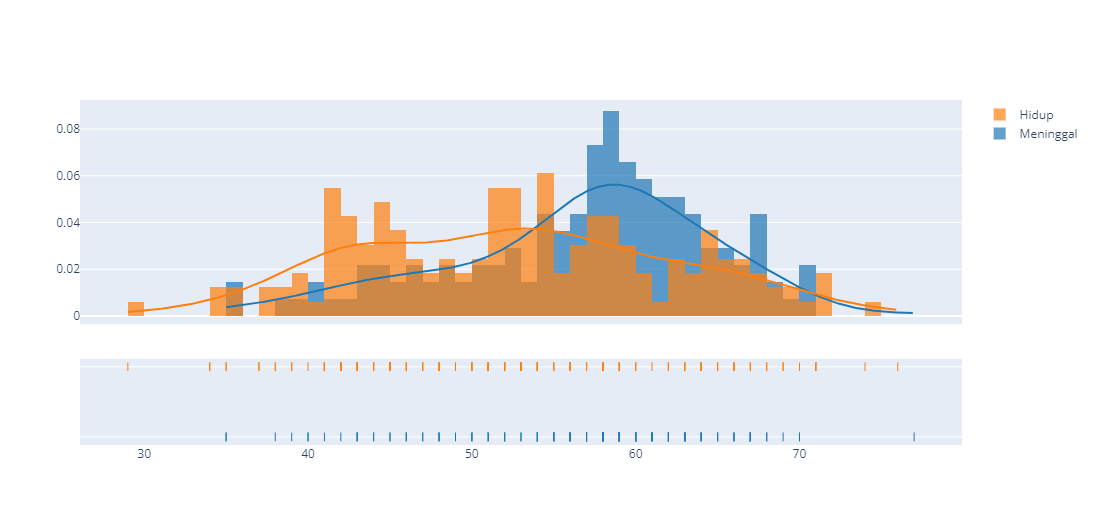

In [12]:
# Melakukan Visualisasi menggunakan Displot pada library Plotly (target x umur)
ff.create_distplot([data[data.target==0].age,
                    data[data.target==1].age],
                   ["Meninggal","Hidup"])

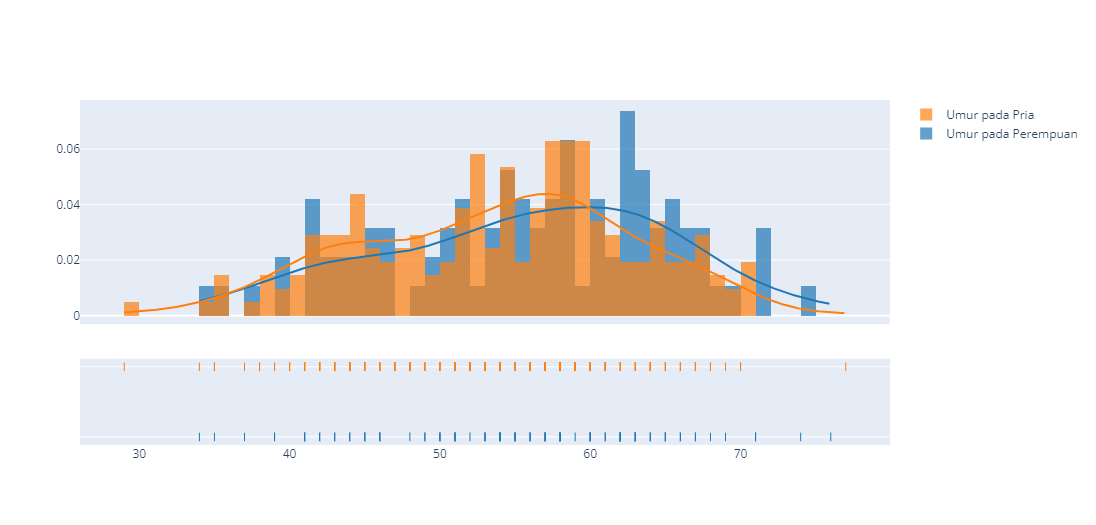

In [14]:
# Melakukan Visualisasi menggunakan Displot pada library Plotly (sex/gender x umur)
ff.create_distplot([data[data.sex==0].age,
                    data[data.sex==1].age],
                   ["Umur pada Perempuan","Umur pada Pria"])

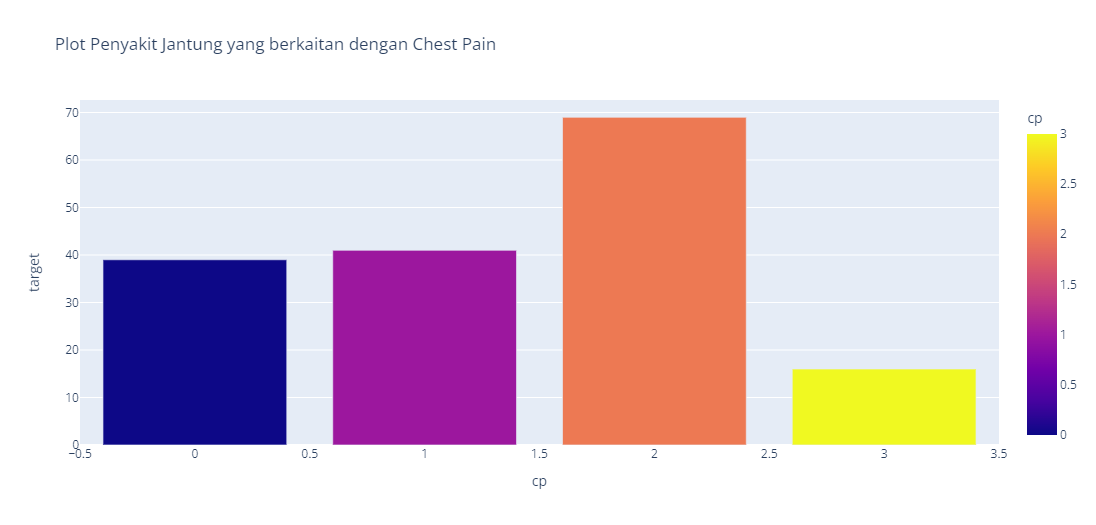

In [19]:
# Mengelompokkan data berdasarkan jenis dada untuk melihat apakah ada jenis nyeri dada (Chest Pain) yang dikaitkan dengan penyakit jantung
px.bar(data.groupby("cp").sum().reset_index()[["cp","target"]],
       x="cp",y="target",color="cp",
       title="Plot Penyakit Jantung yang berkaitan dengan Chest Pain")


In [ ]:

import IPython.display as display
from PIL import Image
image_path = '/content/drive/MyDrive/PYTN_Prakerja_Moch Hazmi Cokro M/Plot/plot 3.png'
display.display(Image.open(image_path))

##**[2] Data Preprocessing**
Melakukan preprocessing diantara lain splitting data

In [25]:
# Penentuan X dan Y untuk data
x = data.iloc[:,:-1]
y = data.target

print(x, y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [26]:
print(x.shape,y.shape)

(303, 13) (303,)


In [30]:
# Melakukan Split Data 80 % Train, 20 % Test berdasarkan Paretto Principle
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(x_train.shape,y_train.shape)
print(x_test.shape, y_test.shape)

(242, 13) (242,)
(61, 13) (61,)


##**[2] Data Processing / Modelling**
Melakukan Modelling pelatihan data menggunakan beberapa algoritma, antara lain logistic Regression, K-Nearest Neighbors, Support Vector Machine, Decision Tree, Random Forest, Naive Bayes

###**[2.1] Logistic Regression**
Menggunakan library sklearn

In [49]:
LR = LogisticRegression(solver="liblinear")
LR.fit(x_train, y_train)

y_pred = LR.predict(x_test)
logreg_sc = accuracy_score(y_pred, y_test)

print(f"Akurasi pada ML Logistic Regression: {(logreg_sc)*100:0.2f}%\n");
print("Classification Report Logistic Regression")
print(classification_report(y_test, y_pred))

Akurasi pada ML Logistic Regression: 85.25%

Classification Report Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        30
           1       0.81      0.94      0.87        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [47]:
def plot_conf_matrix(true,pred,classes):
    cf = confusion_matrix(true, pred)
    plt.figure(figsize=(8,5.5))
    sns.set(font_scale=1.4)
    sns.heatmap(cf, annot=True, annot_kws={"size": 16},xticklabels = classes ,yticklabels = classes,fmt='g',cmap="YlGnBu")
    plt.title('Confusion Matrix - Logistic Regression', fontsize = 20)
    plt.show()

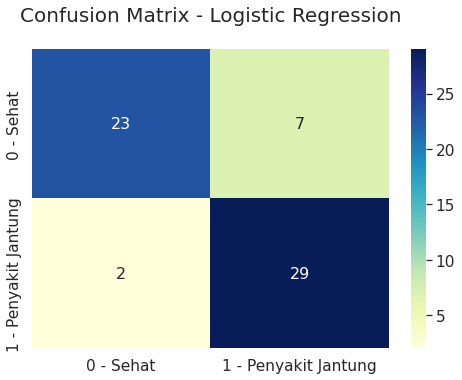

In [48]:
# VisualisasiConfusion Matrix
labels = ['0 - Sehat', '1 - Penyakit Jantung']
plot_conf_matrix(y_test,y_pred,labels)

*Hasil Logistic Regression*

Model LR pada dataset heart.csv menghasilkan acc sebesar 85.25%
*   23 data terprediksi benar sehat dari 30 data test
*   29 data terprediksi benar sakit jantung dari 31 data test

###**[2.2] K-Nearest Neighbors KNN**
Menggunakan library sklearn

In [55]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

knn_sc = accuracy_score(y_pred_knn, y_test)

print(f"Akurasi pada ML K-Nearest Neighbors: {(knn_sc)*100:0.2f}%\n");
print("Classification Report KNN")
print(classification_report(y_test, y_pred_knn))

Akurasi pada ML K-Nearest Neighbors: 63.93%

Classification Report KNN
              precision    recall  f1-score   support

           0       0.70      0.47      0.56        30
           1       0.61      0.81      0.69        31

    accuracy                           0.64        61
   macro avg       0.65      0.64      0.63        61
weighted avg       0.65      0.64      0.63        61



In [57]:
def plot_conf_matrix(true,pred,classes):
    cf = confusion_matrix(true, pred)
    plt.figure(figsize=(8,5.5))
    sns.set(font_scale=1.4)
    sns.heatmap(cf, annot=True, annot_kws={"size": 16},xticklabels = classes ,yticklabels = classes,fmt='g',cmap="YlGnBu")
    plt.title('Confusion Matrix - KNN\n', fontsize = 20)
    plt.show()

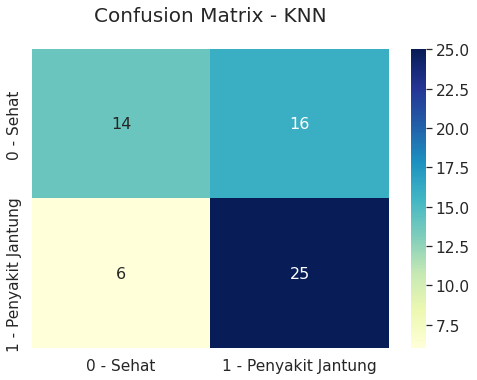

In [58]:
# VisualisasiConfusion Matrix
labels = ['0 - Sehat', '1 - Penyakit Jantung']
plot_conf_matrix(y_test,y_pred_knn,labels)

*Hasil KNN*

Model KNN pada dataset heart.csv menghasilkan acc sebesar 63.93%
*   14 data terprediksi benar sehat dari 30 data test
*   25 data terprediksi benar sakit jantung dari 31 data test

###**[2.3] Support Vector Machine SVM**
Menggunakan library sklearn

In [76]:
svm = SVC(kernel='linear')
svm.fit(x_train, y_train) 
y_pred_svm = svm.predict(x_test)

svm_sc = accuracy_score(y_pred_svm, y_test)

print(f"Akurasi pada ML Support Vector Machine: {(svm_sc)*100:0.2f}%\n");
print("Classification Report SVM")
print(classification_report(y_test, y_pred_svm))

Akurasi pada ML Support Vector Machine: 83.61%

Classification Report SVM
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.80      0.90      0.85        31

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [77]:
def plot_conf_matrix(true,pred,classes):
    cf = confusion_matrix(true, pred)
    plt.figure(figsize=(8,5.5))
    sns.set(font_scale=1.4)
    sns.heatmap(cf, annot=True, annot_kws={"size": 16},xticklabels = classes ,yticklabels = classes,fmt='g',cmap="YlGnBu")
    plt.title('Confusion Matrix - SVM\n', fontsize = 20)
    plt.show()

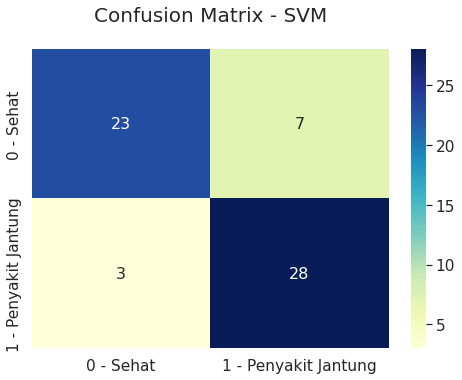

In [78]:
# VisualisasiConfusion Matrix
labels = ['0 - Sehat', '1 - Penyakit Jantung']
plot_conf_matrix(y_test,y_pred_svm,labels)

*Hasil SVM*

Model SVM pada dataset heart.csv menghasilkan acc sebesar 83.61%
*   23 data terprediksi benar sehat dari 30 data test
*   28 data terprediksi benar sakit jantung dari 31 data test

###**[2.4] Decision Tree DT**
Menggunakan library sklearn

In [62]:
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

dt_sc = accuracy_score(y_pred_dt, y_test)

print(f"Akurasi pada ML Decision Tree: {(dt_sc)*100:0.2f}%\n");
print("Classification Report DT")
print(classification_report(y_test, y_pred_dt))

Akurasi pada ML Decision Tree: 73.77%

Classification Report DT
              precision    recall  f1-score   support

           0       0.72      0.77      0.74        30
           1       0.76      0.71      0.73        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [63]:
def plot_conf_matrix(true,pred,classes):
    cf = confusion_matrix(true, pred)
    plt.figure(figsize=(8,5.5))
    sns.set(font_scale=1.4)
    sns.heatmap(cf, annot=True, annot_kws={"size": 16},xticklabels = classes ,yticklabels = classes,fmt='g',cmap="YlGnBu")
    plt.title('Confusion Matrix - DT\n', fontsize = 20)
    plt.show()

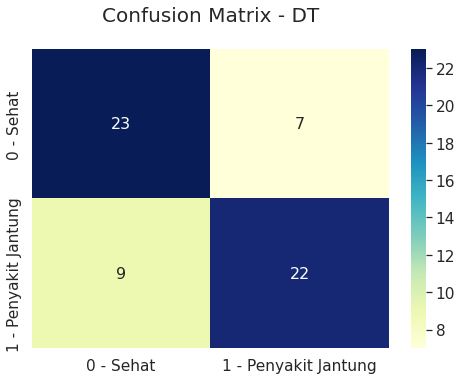

In [64]:
# VisualisasiConfusion Matrix
labels = ['0 - Sehat', '1 - Penyakit Jantung']
plot_conf_matrix(y_test,y_pred_dt,labels)

*Hasil DT*

Model DT pada dataset heart.csv menghasilkan acc sebesar 73.77%
*   23 data terprediksi benar sehat dari 30 data test
*   22 data terprediksi benar sakit jantung dari 31 data test

###**[2.5] Random Forest RF**
Menggunakan library sklearn

In [80]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

rf_sc = accuracy_score(y_pred_rf, y_test)

print(f"Akurasi pada ML Random Forest: {(rf_sc)*100:0.2f}%\n");
print("Classification Report RF")
print(classification_report(y_test, y_pred_rf))

Akurasi pada ML Random Forest: 83.61%

Classification Report RF
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.80      0.90      0.85        31

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [67]:
def plot_conf_matrix(true,pred,classes):
    cf = confusion_matrix(true, pred)
    plt.figure(figsize=(8,5.5))
    sns.set(font_scale=1.4)
    sns.heatmap(cf, annot=True, annot_kws={"size": 16},xticklabels = classes ,yticklabels = classes,fmt='g',cmap="YlGnBu")
    plt.title('Confusion Matrix - RF\n', fontsize = 20)
    plt.show()

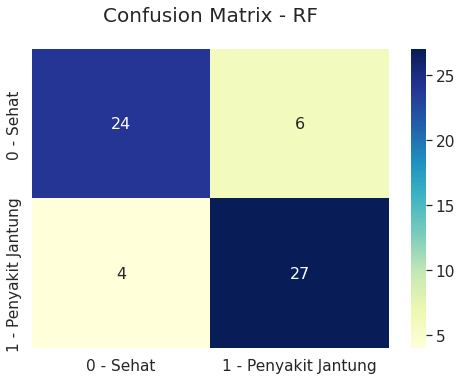

In [68]:
# VisualisasiConfusion Matrix
labels = ['0 - Sehat', '1 - Penyakit Jantung']
plot_conf_matrix(y_test,y_pred_rf,labels)

*Hasil RF*

Model RF pada dataset heart.csv menghasilkan acc sebesar 83.61%
*   24 data terprediksi benar sehat dari 30 data test
*   27 data terprediksi benar sakit jantung dari 31 data test

###**[2.6] Naive Bayes NB**
Menggunakan library sklearn

In [69]:
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)

nb_sc = accuracy_score(y_pred_nb, y_test)

print(f"Akurasi pada ML Naive Bayes: {(nb_sc)*100:0.2f}%\n");
print("Classification Report NB")
print(classification_report(y_test, y_pred_nb))

Akurasi pada ML Naive Bayes: 73.77%

Classification Report NB
              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [70]:
def plot_conf_matrix(true,pred,classes):
    cf = confusion_matrix(true, pred)
    plt.figure(figsize=(8,5.5))
    sns.set(font_scale=1.4)
    sns.heatmap(cf, annot=True, annot_kws={"size": 16},xticklabels = classes ,yticklabels = classes,fmt='g',cmap="YlGnBu")
    plt.title('Confusion Matrix - NB\n', fontsize = 20)
    plt.show()

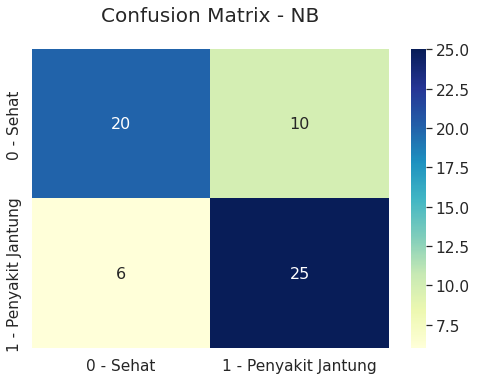

In [71]:
# VisualisasiConfusion Matrix
labels = ['0 - Sehat', '1 - Penyakit Jantung']
plot_conf_matrix(y_test,y_pred_nb,labels)

*Hasil RF*

Model RF pada dataset heart.csv menghasilkan acc sebesar 83.61%
*   20 data terprediksi benar sehat dari 30 data test
*   25 data terprediksi benar sakit jantung dari 31 data test

##**[3] Hasil dan Pembahasan**
Melakukan pembahasan antara masing-masing algoritma ML

In [84]:
hasil = pd.DataFrame({'Model':['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes'], 
                         'Accuracy':[logreg_sc, knn_sc, svm_sc, dt_sc, rf_sc, nb_sc]})

hasil.sort_values(by="Accuracy",ascending=False,inplace=True)
hasil

,Model,Accuracy
0,Logistic Regression,0.852459
2,SVM,0.836066
4,Random Forest,0.836066
5,Naive Bayes,0.803279
3,Decision Tree,0.737705
1,KNN,0.688525


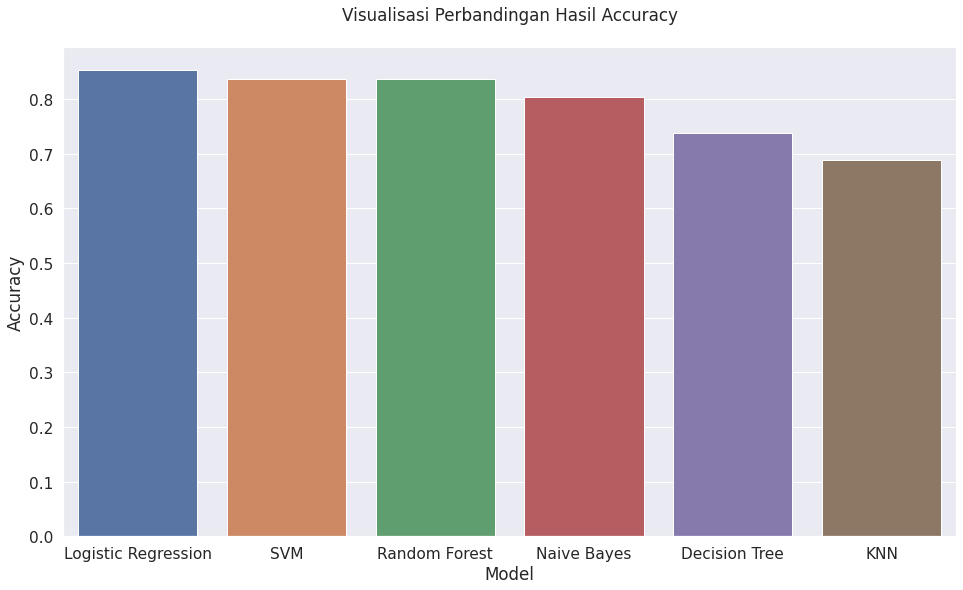

In [93]:
# Visualisasi Perbandingan Hasil Accuracy
plt.figure(figsize=(16,9))
sns.barplot(x=hasil['Model'],
           y=hasil['Accuracy']).set_title('Visualisasi Perbandingan Hasil Accuracy\n')
plt.show()

3 Model Algoritma dengan accuracy tertinggi yang diuji pada data test yaitu : 

**Logistic Regression, SVM dan Random Forest**

Ada beberapa faktor yang mendukung accuracy tertinggi tersebut, ataupun untuk pengerjaan selanjutnya diharapkan memperhatikan beberapa faktor berikut seperti :
1. Fitur-fitur penting pada dataset yang dapat menunjang 
2. Penggunaan Parameter - parameter yang sesuai untuk model classifier
3. Penggunaan GridSearchCV atau semacamnya untuk melakukan tunning agar mendapaktkan parameter yang sesuai dan cocok untuk model classifier yang diusulkan.